In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
# check version
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=v2.Compose([
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True)

]),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    # transform=ToTensor(),
     transform=v2.Compose([
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True)

]),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 108MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.97MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 67.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 1.63MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

torch.Size([1, 28, 28])


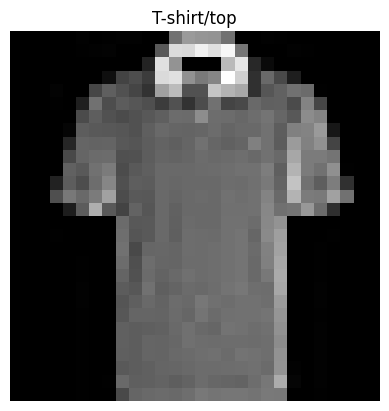

In [6]:
# show image visually
import random
random_idx = random.randint(0, len(train_data))
image, label = train_data[random_idx]
print(image.shape)

plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis("off")
plt.show()

In [7]:
image.dtype # toTensor convet the image into float32  and in the range of 0 and 1 from 0 and 255

torch.float32

In [8]:
len(random.sample( range(len(train_data)),25) )

25

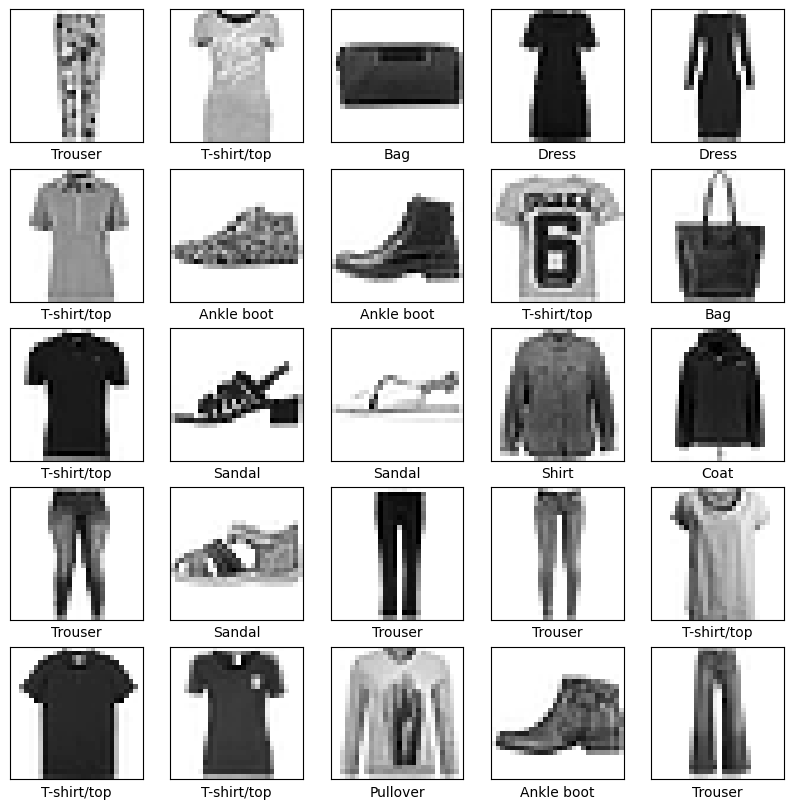

In [9]:
plt.figure(figsize=(10,10))
for index,i in enumerate(random.sample(range(len(train_data)),25)) :
    image, label = train_data[i]
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.squeeze(), cmap=plt.cm.binary) # Extracting the image and squeezing it
    plt.xlabel(train_data.classes[label])
plt.show()

In [10]:
from torch.utils.data import DataLoader
# we have create our dataloader for loading the data in the batch in to the model
train_data_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_data_loader = DataLoader(dataset=test_data, batch_size=32, shuffle= False)

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


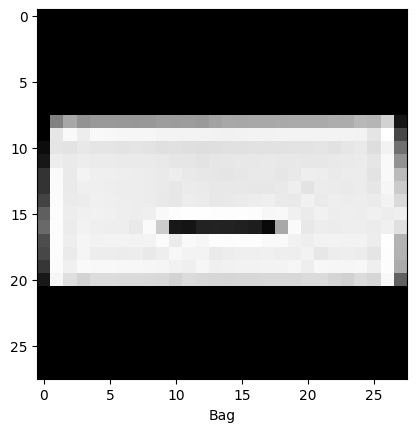

Label: 8


In [11]:
# Display image and label.
train_features, train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.xlabel(train_data.classes[label])
plt.show()
print(f"Label: {label}")

# we have to show the data

torch.Size([1, 28, 28])


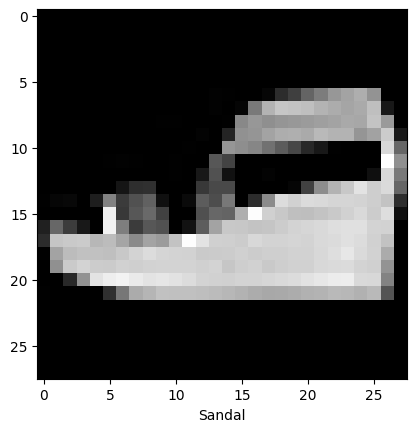

Label: 5


In [12]:

import random
random_idx = random.randint(0, len(train_features))
image, label = train_features[random_idx], train_labels[random_idx]
print(image.shape)
plt.imshow(image.squeeze(), cmap="gray")
plt.xlabel(train_data.classes[label])
plt.show()
print(f"Label: {label}")


In [13]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device
a = torch.randn(1,1,28,28) # batch_size, color_channel, height, widht
a.shape

torch.Size([1, 1, 28, 28])

In [14]:
nn.Flatten()(a).shape

torch.Size([1, 784])

In [15]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  # we have to define the forward pass
  def forward(self, x):
    return self.layer_stack(x)

In [16]:
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=20,
    output_shape=len(train_data.classes)
  ).to(device)

In [17]:
# Loss function and optimizer
from torch import optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model_0.parameters(), lr=0.1)

In [18]:
import time

In [19]:
# time count function
def time_count(start_time:int,
               end_time:int,
               device:torch.device
               ):
    elapsed_time = end_time - start_time

    # this function is used to m
    print(f"The Time Taken By The Mode Is:{elapsed_time:.3f} Second On GPU/CPU:{device}")


In [20]:
start_time = time.perf_counter()

end_time = time.perf_counter()
time_count(start_time,end_time,device)

The Time Taken By The Mode Is:0.000 Second On GPU/CPU:cuda


In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0178, -0.0340,  0.0074,  ..., -0.0252, -0.0020, -0.0354],
                      [-0.0304,  0.0340, -0.0091,  ..., -0.0144,  0.0125,  0.0271],
                      [-0.0040, -0.0341, -0.0306,  ..., -0.0068, -0.0319,  0.0252],
                      ...,
                      [ 0.0243, -0.0231, -0.0336,  ...,  0.0330, -0.0310, -0.0337],
                      [-0.0069,  0.0179,  0.0234,  ...,  0.0211, -0.0236, -0.0239],
                      [-0.0324,  0.0037,  0.0317,  ..., -0.0222, -0.0129,  0.0109]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0014,  0.0023, -0.0237, -0.0294,  0.0193,  0.0150, -0.0200,  0.0042,
                       0.0187,  0.0288, -0.0262,  0.0234,  0.0017, -0.0198,  0.0176, -0.0208,
                       0.0349, -0.0052, -0.0099, -0.0231], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[-0.0554, -0.1739,  0.1549, 

In [22]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [23]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 31.3 MB/s eta 0:00:00


In [24]:
from torchmetrics import Accuracy
accuracy = Accuracy(task='multiclass', num_classes=len(train_data.classes))
from sklearn.metrics import accuracy_score

# y_logit = model_0()



In [25]:
from tqdm import tqdm


# now we have to make the number of the epoch to train  the model

EPOCH = 3
for epoch  in tqdm(range(EPOCH)):
  print(f"EPOCH: -----------------{epoch}------------------")
  # first we have to make the model to train mood
  # than we have to predict the outcome of the model
  # we have to used the backpropigation to loss
  # optimization to update the weight of the model
  # we have batch of the image so we have to make the loss for per batch to make the model more optimization for image classifcation
  # now we have to make the train loop to train the model for the classification of the image
  # WE HAVE TO CALCULATE THE LOSS FOR PER BATCH OF THE IMAGES
  train_loss = 0
  model_0.train()
  for batch, (X,y) in enumerate(train_data_loader):
    X, y = X.to(device), y.to(device)
    y_logit = model_0(X)
    loss = loss_fn(y_logit, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # test
  test_loss = 0
  test_accuracy=0
  model_0.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(test_data_loader):
      X_test, y_test = X.to(device), y.to(device)
      test_logit = model_0(X_test)
      y_pred = torch.argmax(test_logit, dim=1)
      test_loss += loss_fn(test_logit, y_test)

      test_accuracy += accuracy_score( y_test.cpu(), y_pred.cpu())

  print(f"Train Loss: {train_loss/len(train_data_loader)}")
  print(f"Test Loss: {test_loss/len(test_data_loader)}")
  print(f"Test Accuracy: {test_accuracy/len(test_data_loader)}")






  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH: -----------------0------------------


 33%|███▎      | 1/3 [00:28<00:57, 28.89s/it]

Train Loss: 0.5831969976425171
Test Loss: 0.5579290986061096
Test Accuracy: 0.8123003194888179
EPOCH: -----------------1------------------


 67%|██████▋   | 2/3 [00:47<00:22, 22.88s/it]

Train Loss: 0.4731252193450928
Test Loss: 0.47793710231781006
Test Accuracy: 0.828973642172524
EPOCH: -----------------2------------------


100%|██████████| 3/3 [01:05<00:00, 21.73s/it]

Train Loss: 0.4543427526950836
Test Loss: 0.47969117760658264
Test Accuracy: 0.8246805111821086


In [26]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_score( y.cpu(), y_pred.argmax(dim=1).cpu())

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_0_results = eval_model(model=model_0, data_loader=test_data_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy,
    device=device
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47969117760658264,
 'model_acc': 0.8246805111821086}

In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y.cpu(),
                                 y_pred=y_pred.argmax(dim=1).cpu()) # Go from logits -> pred labels


        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y.cpu(),
                y_pred=test_pred.argmax(dim=1).cpu() # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [28]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(train_data.classes)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [29]:
from tqdm import tqdm


# now we have to make the number of the epoch to train  the model

# make this for model_2
EPOCH = 3
# create a new optimizer for model_2
optimizer_2 = optim.SGD(params=model_2.parameters(), lr=0.1)

for epoch  in tqdm(range(EPOCH)):
  print(f"EPOCH: -----------------{epoch}------------------")
  train_step(model=model_2,
             data_loader=train_data_loader,
             loss_fn=loss_fn,
             optimizer=optimizer_2,
             accuracy_fn=accuracy_score,
             device=device)

  test_step(data_loader=test_data_loader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_score,
            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH: -----------------0------------------
Train loss: 0.57956 | Train accuracy: 0.79%


 33%|███▎      | 1/3 [00:22<00:44, 22.24s/it]

Test loss: 0.39210 | Test accuracy: 0.86%

EPOCH: -----------------1------------------
Train loss: 0.35615 | Train accuracy: 0.87%


 67%|██████▋   | 2/3 [00:43<00:21, 21.52s/it]

Test loss: 0.36197 | Test accuracy: 0.87%

EPOCH: -----------------2------------------
Train loss: 0.31808 | Train accuracy: 0.88%


100%|██████████| 3/3 [01:03<00:00, 21.23s/it]

Test loss: 0.32905 | Test accuracy: 0.88%



In [30]:
# model_2 eval
model_2_results = eval_model(model=model_2, data_loader=test_data_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy_score,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3290475308895111,
 'model_acc': 0.8763977635782748}

In [31]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47969117760658264,
 'model_acc': 0.8246805111821086}

In [32]:
import pandas as pd
data = pd.DataFrame([model_0_results, model_2_results])
data

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.479691,0.824681
1,FashionMNISTModelV2,0.329048,0.876398


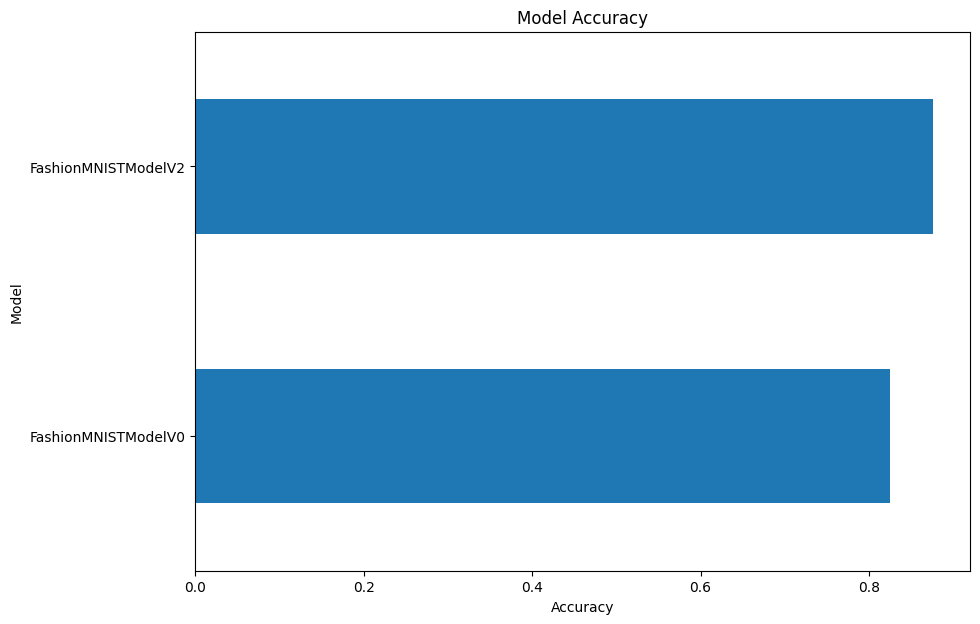

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
data.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()



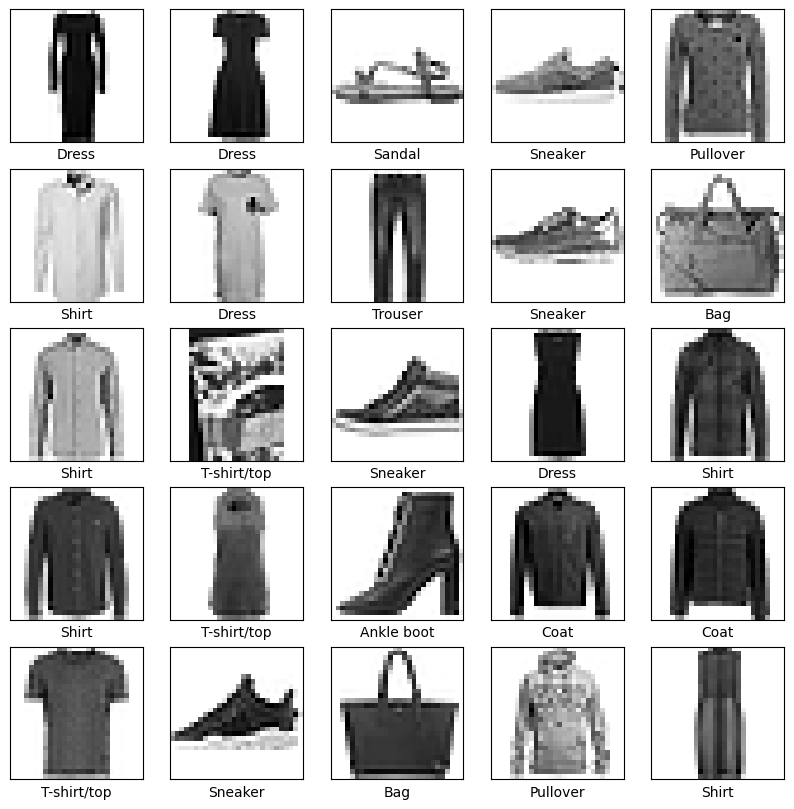

In [34]:
test_sample  = []
test_labels = []
plt.figure(figsize=(10,10))
random_images = random.sample(list(test_data),25)
for index,i in enumerate(random_images):
    image, label = i
    test_sample.append(image)
    test_labels.append(label)
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.squeeze(), cmap=plt.cm.binary) # Extracting the image and squeezing it
    plt.xlabel(train_data.classes[label])
plt.show()

In [35]:
def prediction(model:torch.nn.Module, data, device: torch.device=device):
  model_2.to(device)
  model_2.eval()
  with torch.inference_mode():
    logits = model_2(data.to(device))
    probabilities = torch.softmax(logits, dim=0).argmax(dim=1)
  return probabilities.cpu()

In [36]:
pred_item =prediction(model_2, torch.stack(test_sample))
pred_item , test_labels


(tensor([3, 3, 5, 7, 2, 6, 3, 1, 7, 8, 6, 2, 7, 3, 6, 6, 3, 9, 2, 4, 0, 7, 8, 2,
         3]),
 [3, 3, 5, 7, 2, 6, 3, 1, 7, 8, 6, 0, 7, 3, 6, 6, 0, 9, 4, 4, 0, 7, 8, 2, 6])

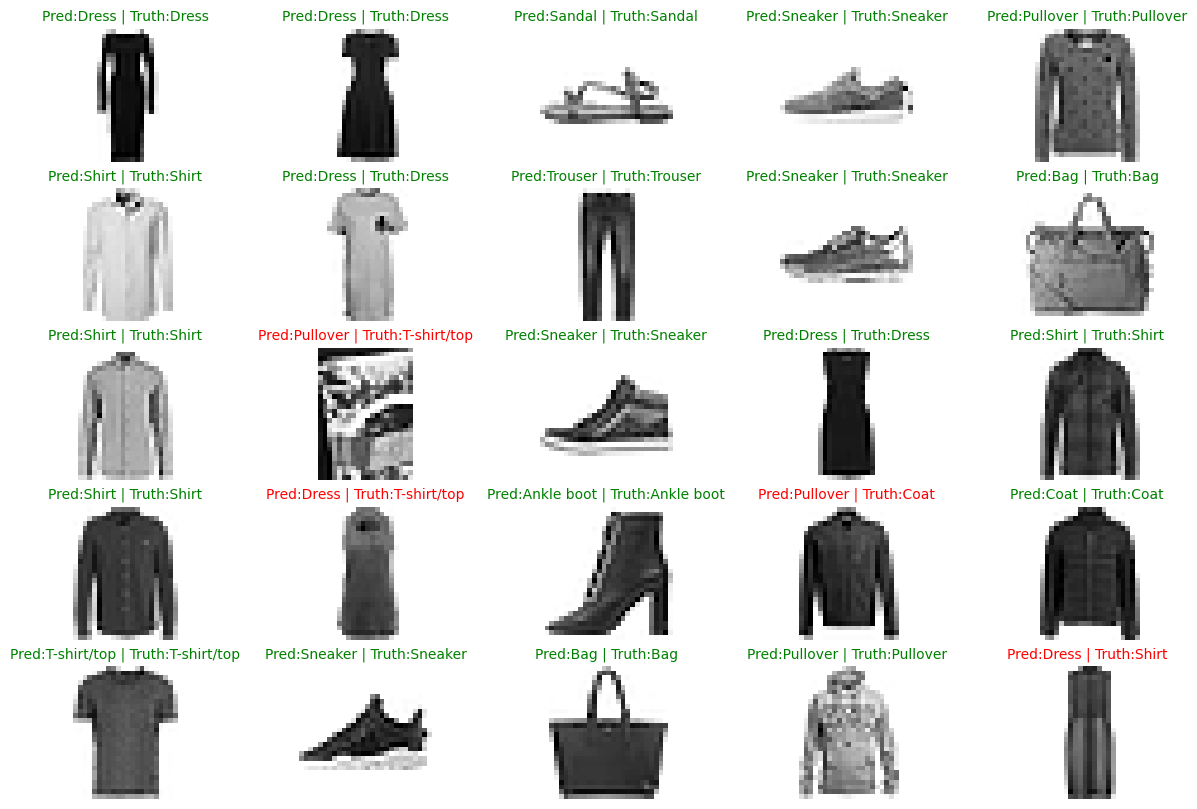

In [37]:

plt.figure(figsize=(15,10))
for index,i in enumerate(torch.stack(test_sample)):
    image = i
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Pred:{train_data.classes[pred_item[index]]} | Truth:{train_data.classes[test_labels[index]]}",
              fontsize=10,
              c="g" if train_data.classes[pred_item[index]] ==train_data.classes[test_labels[index]] else "r")
    plt.imshow(image.squeeze(), cmap=plt.cm.binary) # Extracting the image and squeezing it
    # plt.xlabel(train_data.classes[pred_item[index]])
    plt.axis(False)
plt.show()

In [38]:
model_2.eval()
y_preds = []
y_target = []
with torch.inference_mode():
    for X, y in tqdm(test_data_loader):
       # Send data to the target device
      X, y = X.to(device), y.to(device)
      y_logit = model_2(X)
      y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
      y_preds.append(y_pred.cpu())
      y_target.append(y.cpu())



y_preds = torch.cat(y_preds)
y_target = torch.cat(y_target)

100%|██████████| 313/313 [00:02<00:00, 148.69it/s]


In [39]:
y_target

tensor([9, 2, 1,  ..., 8, 1, 5])

In [40]:
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__} mlxtend version{mlxtend.__version__}")

except:
  !pip install torchmetrics mlxtend
  import torchmetrics, mlxtend
  print(torchmetrics.__version__,mlxtend.__version__)


torchmetrics version: 1.8.2 mlxtend version0.23.4


In [41]:
confmat = torchmetrics.ConfusionMatrix(num_classes=len(train_data.classes), task="multiclass")
confmat(y_preds, y_target)

tensor([[901,   0,  13,   9,   4,   1,  66,   0,   6,   0],
        [  9, 969,   0,  14,   1,   0,   6,   0,   1,   0],
        [ 13,   1, 853,   3,  57,   0,  71,   0,   2,   0],
        [ 70,   6,  21, 849,  19,   0,  35,   0,   0,   0],
        [  4,   1, 122,  36, 705,   0, 130,   0,   2,   0],
        [  0,   0,   0,   0,   0, 972,   0,  17,   3,   8],
        [214,   2,  74,  11,  52,   0, 631,   0,  16,   0],
        [  0,   0,   0,   0,   0,  20,   0, 948,   0,  32],
        [  2,   1,   5,   6,   3,   2,   7,   4, 970,   0],
        [  0,   0,   0,   0,   0,   7,   0,  29,   0, 964]])

In [42]:
from mlxtend.plotting import plot_confusion_matrix



In [43]:
y_preds.numpy()

array([9, 2, 1, ..., 8, 1, 5])

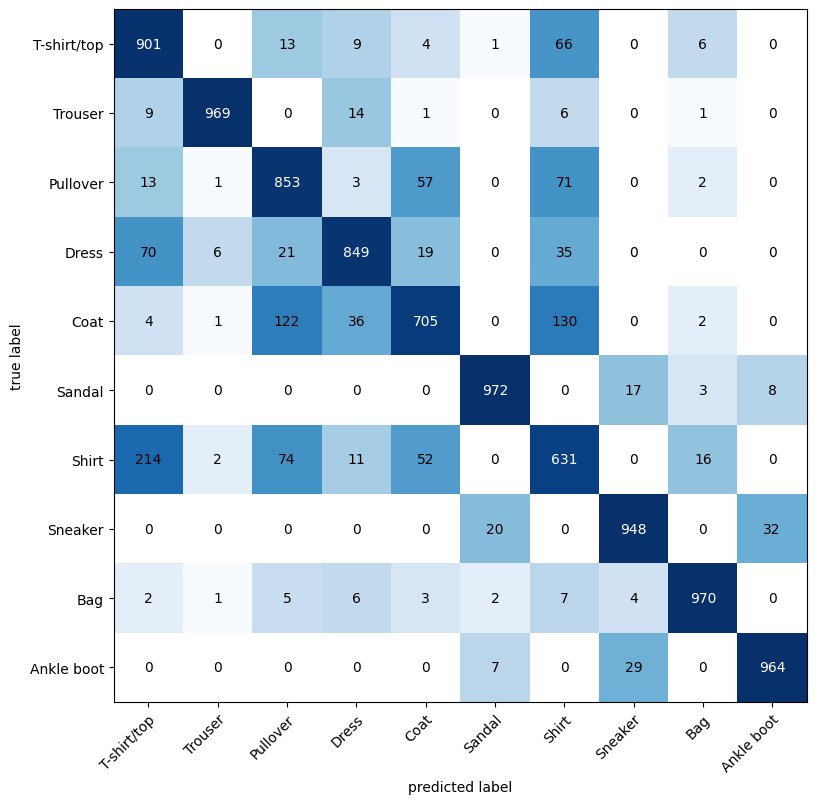

In [44]:
import matplotlib

fig, ax = plot_confusion_matrix(
    conf_mat=confmat(y_preds, y_target).cpu().numpy(),
    class_names=train_data.classes,
    norm_colormap=matplotlib.colors.LogNorm(),
    figsize=(10,9)
)

In [50]:
# loading of the model
# https://docs.pytorch.org/tutorials/beginner/saving_loading_models.

from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "FashionMNISTModelV2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [52]:
# LOADING OF THE MODEL
load_model = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(train_data.classes))
load_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [56]:
eval_model(model=load_model.to(device), data_loader=test_data_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy,
)

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3290475308895111,
 'model_acc': 0.8763977635782748}

In [57]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3290475308895111,
 'model_acc': 0.8763977635782748}